In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats
from IPython.display import display

from sklearn.preprocessing import Imputer


In [59]:
data.head()

,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
0,-200.0,-200.0,7.2,867.0,-200.0,834.0,-200.0,1314.0,891.0,14.8,57.3,0.9603,NaN
1,0.5,-200.0,3.9,704.0,-200.0,861.0,-200.0,1603.0,860.0,24.4,65.0,1.9612,Low
2,3.7,-200.0,23.3,1386.0,NaN,626.0,109.0,2138.0,NaN,23.3,38.6,1.0919,High
3,2.1,-200.0,12.1,1052.0,183.0,779.0,NaN,1690.0,952.0,28.5,27.3,1.0479,High
4,4.4,-200.0,21.7,1342.0,786.0,499.0,206.0,1546.0,2006.0,12.9,54.1,0.8003,High


In [60]:
# Sciktlearn imputation function 

In [61]:
sk_imputer = Imputer(strategy="mean")

In [63]:
# imputing the mean 

In [68]:
pd.DataFrame(sk_imputer.fit_transform(data.drop('level', axis=1).head()))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-200.0,-200.0,7.2,867.0,-200.00,834.0,-200.00,1314.0,891.00,14.8,57.3,0.9603
1,0.5,-200.0,3.9,704.0,-200.00,861.0,-200.00,1603.0,860.00,24.4,65.0,1.9612
2,3.7,-200.0,23.3,1386.0,142.25,626.0,109.00,2138.0,1177.25,23.3,38.6,1.0919
3,2.1,-200.0,12.1,1052.0,183.00,779.0,-21.25,1690.0,952.00,28.5,27.3,1.0479
4,4.4,-200.0,21.7,1342.0,786.00,499.0,206.00,1546.0,2006.00,12.9,54.1,0.8003


## Task 2
`forecasting_dataset.csv` is a file that contains pollution data for a city. Your task is to create a model that, when fed with columns `co_gt`, `nhmc`, `c6h6`, `s2`, `nox`, `s3`, `no2`, `s4`, `s5`, `t`, `rh`, `ah`, and `level`, predicts the value of `y` six hours later.

**NOTE:** In the data we've given you, the value of `y` for a given row is the value of `y` *for the timestamp of that same row*. We're asking you to predict the value of `y` 6 hours *after the timestamp of that row*.

In [6]:
## What the data that we'll feed into your model's predict(X) function will look like:
# Notice what the level column looks like
data=pd.read_csv("forecasting_dataset.csv").drop(labels=['date', 'time', 'y'], axis='columns')

In [15]:
data.head()

,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
0,-200.0,-200.0,7.2,867.0,-200.0,834.0,-200.0,1314.0,891.0,14.8,57.3,0.9603,NaN
1,0.5,-200.0,3.9,704.0,-200.0,861.0,-200.0,1603.0,860.0,24.4,65.0,1.9612,Low
2,3.7,-200.0,23.3,1386.0,NaN,626.0,109.0,2138.0,NaN,23.3,38.6,1.0919,High
3,2.1,-200.0,12.1,1052.0,183.0,779.0,NaN,1690.0,952.0,28.5,27.3,1.0479,High
4,4.4,-200.0,21.7,1342.0,786.0,499.0,206.0,1546.0,2006.0,12.9,54.1,0.8003,High


In [7]:
data_all=pd.read_csv("forecasting_dataset.csv")

In [11]:
data_all.head()

,date,time,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
0,10/13/2004,20:00:00,943,-200.0,-200.0,7.2,867.0,-200.0,834.0,-200.0,1314.0,891.0,14.8,57.3,0.9603,NaN
1,8/10/2004,3:00:00,919,0.5,-200.0,3.9,704.0,-200.0,861.0,-200.0,1603.0,860.0,24.4,65.0,1.9612,Low
2,6/21/2004,8:00:00,1221,3.7,-200.0,23.3,1386.0,NaN,626.0,109.0,2138.0,NaN,23.3,38.6,1.0919,High
3,7/12/2004,12:00:00,1024,2.1,-200.0,12.1,1052.0,183.0,779.0,NaN,1690.0,952.0,28.5,27.3,1.0479,High
4,12/14/2004,12:00:00,1377,4.4,-200.0,21.7,1342.0,786.0,499.0,206.0,1546.0,2006.0,12.9,54.1,0.8003,High


### To count the missing values 

In [16]:
data.isnull().sum()

co_gt    441
nhmc     434
c6h6     413
s2       421
nox      425
s3       416
no2      455
s4       394
s5       400
t        424
rh       436
ah       425
level    418
dtype: int64

In [17]:
### If you see from above there are quite a few missing values in the data set.

#### Lets check the correlation between the variables 

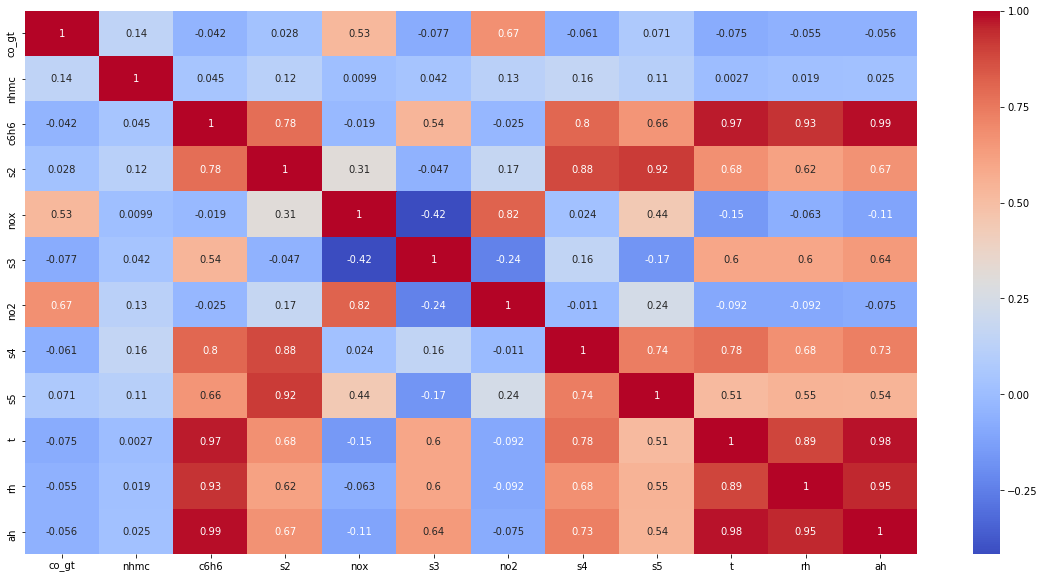

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [23]:
## TO check and dividing the data into categorical and numarical variables 

In [69]:
# No of columns 
cols = data.columns
num_cols = data._get_numeric_data().columns
num_cols

Index(['co_gt', 'nhmc', 'c6h6', 's2', 'nox', 's3', 'no2', 's4', 's5', 't',
       'rh', 'ah'],
      dtype='object')

### Categorical varible in the data set 

In [27]:
list(set(cols) - set(num_cols))

['level']

### Continous  varible in the data set 

In [28]:
contious_variables=data.drop('level', axis=1)

In [29]:
 median_of_columns = contious_variables.notnull()

In [30]:
median_of_columns = contious_variables.notnull()

In [36]:
median_of_columns_1 = median_of_columns.mean()

In [37]:
median_of_columns_1

co_gt    0.947631
nhmc     0.948462
c6h6     0.950956
s2       0.950006
nox      0.949531
s3       0.950600
no2      0.945968
s4       0.953212
s5       0.952500
t        0.949650
rh       0.948225
ah       0.949531
dtype: float64

### Continous  varible in the data set 